In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images[0].shape

(28, 28)

In [15]:
import matplotlib.pyplot as plt

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

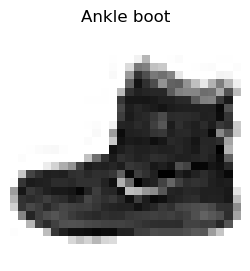

In [19]:
plt.figure(figsize = (3,3))
plt.imshow(train_images[0], cmap = 'binary')
plt.title(class_names[train_labels[0]])
plt.axis(False)

In [20]:
import random

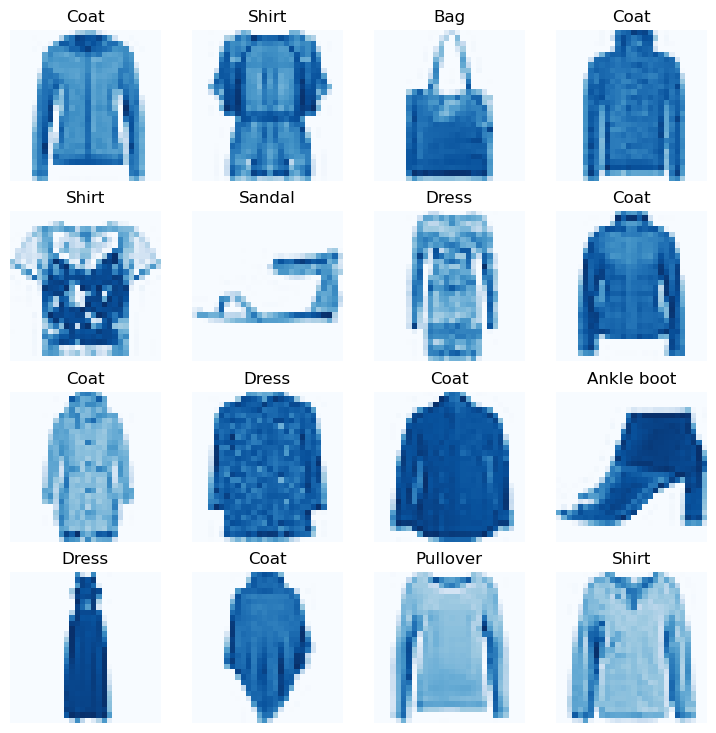

In [23]:
plt.figure(figsize = (9,9))
for i in range(16):
    plt.subplot(4,4,i+1)
    ran_num = random.randint(0,len(train_images)-1)
    plt.imshow(train_images[ran_num], cmap = 'Blues')
    plt.title(class_names[train_labels[ran_num]])
    plt.axis(False)

In [25]:
train_images = train_images/255.
test_images = test_images/255.

In [42]:
from tensorflow.keras import layers, optimizers,losses

In [44]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

In [45]:
model.compile(loss = losses.SparseCategoricalCrossentropy(),
            optimizer = optimizers.Adam(),
            metrics = ['accuracy'])

In [46]:
history = model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5012 - accuracy: 0.8192
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8613
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3177 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2991 - accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2824 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2756 - accuracy: 0.8971
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2632 - accuracy: 0.9008
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2530 - accuracy: 0.9041
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.247

In [65]:
prob_images = model.predict(test_images)
prob_images

313/313 [==============================] - 1s 2ms/step


array([[1.06089306e-03, 1.41301070e-05, 6.22526713e-05, ...,
        2.85533011e-01, 2.52275466e-04, 9.96833086e-01],
       [2.11061612e-01, 5.99463283e-06, 9.98988450e-01, ...,
        5.11507642e-05, 1.40879056e-04, 1.29902692e-04],
       [2.46952241e-03, 9.99999881e-01, 1.73571948e-06, ...,
        4.91249964e-20, 1.52918986e-07, 6.29465628e-18],
       ...,
       [7.46360645e-02, 2.12258357e-07, 5.53066190e-03, ...,
        1.71040391e-08, 9.99989986e-01, 1.14657574e-07],
       [1.06708973e-03, 9.99997258e-01, 1.72121065e-06, ...,
        1.68123938e-15, 2.40351965e-05, 3.70131341e-14],
       [4.19897580e-04, 8.54470386e-07, 7.87207500e-06, ...,
        2.39840001e-01, 3.46859510e-04, 7.66594112e-02]], dtype=float32)

In [49]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3332 - accuracy: 0.8842


[0.3331553041934967, 0.8841999769210815]

In [67]:
pred_images = prob_images.round()
pred_images

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
class_names[pred_images[0].argmax()]

'Pullover'

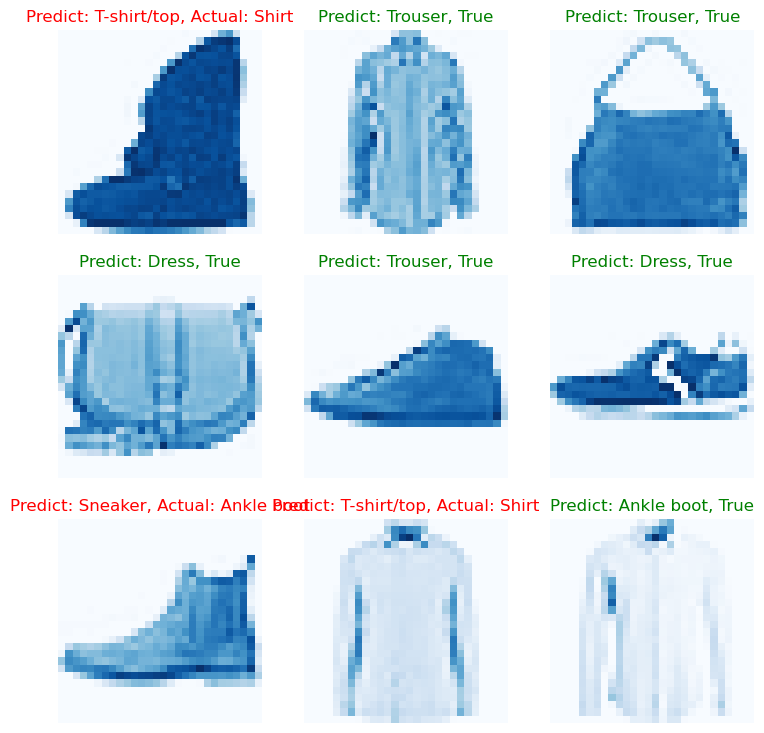

In [90]:
plt.figure(figsize = (9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    ran_num = random.randint(0,len(test_images)-1)
    plt.imshow(train_images[ran_num], cmap = 'Blues')
    plt.title(f"Predict: {class_names[pred_images[ran_num].argmax()]},{' True' if class_names[pred_images[ran_num].argmax()]==class_names[test_labels[ran_num]]else ' Actual: '+class_names[test_labels[ran_num]]}", color = 'green'if class_names[pred_images[ran_num].argmax()]==class_names[test_labels[ran_num]] else 'red')
    plt.axis(False)